## Get examples: first image, intermediate one and last one
To have a full view of the problem, it is necessary to have information about the most common cases and the edges.

In [35]:
import os
# File paths
paths = os.listdir('screenshots')

# --- First and last images have special cropping parameters ---
# First image
name_first = paths[0]
path_first = os.path.join('screenshots', paths[0])

# Last image: find number (python sorts by name)
find_int = len(paths) - 1 # starts in 0
name_last = [name for name in paths if str(find_int) in name]
path_last = os.path.join('screenshots', name_last[0])

# Intermediate cases
names = [name for name in paths if name not in (name_first, name_last)]
path_middle = os.path.join('screenshots', names[0])

## Get Cropping Parameters
Draw rectangles matching item boxes. When they are correctly aligned, their parameters will be use to crop the image.

In [36]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def draw_rectangles(path, START_Y, START_X=97, WIDTH=182, HEIGHT=180, GAP_X=35, GAP_Y=22, NUM_ROWS=2, NUM_COLS=8):
    # Load image
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    for idx_row in range(NUM_ROWS):
        for idx_col in range(NUM_COLS):
            # Square sides
            left_side = START_X + idx_col * (WIDTH + GAP_X)
            right_side = left_side + WIDTH
            top_side = START_Y + idx_row * (HEIGHT + GAP_Y)
            bottom_side = top_side + HEIGHT

            # Draw Squares
            top_left = (left_side, top_side)
            bottom_right = (right_side, bottom_side)
            cv2.rectangle(img_rgb, top_left, bottom_right, (255, 0, 0), 2)

    # Plot image with squares
    plt.figure(figsize=(15, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

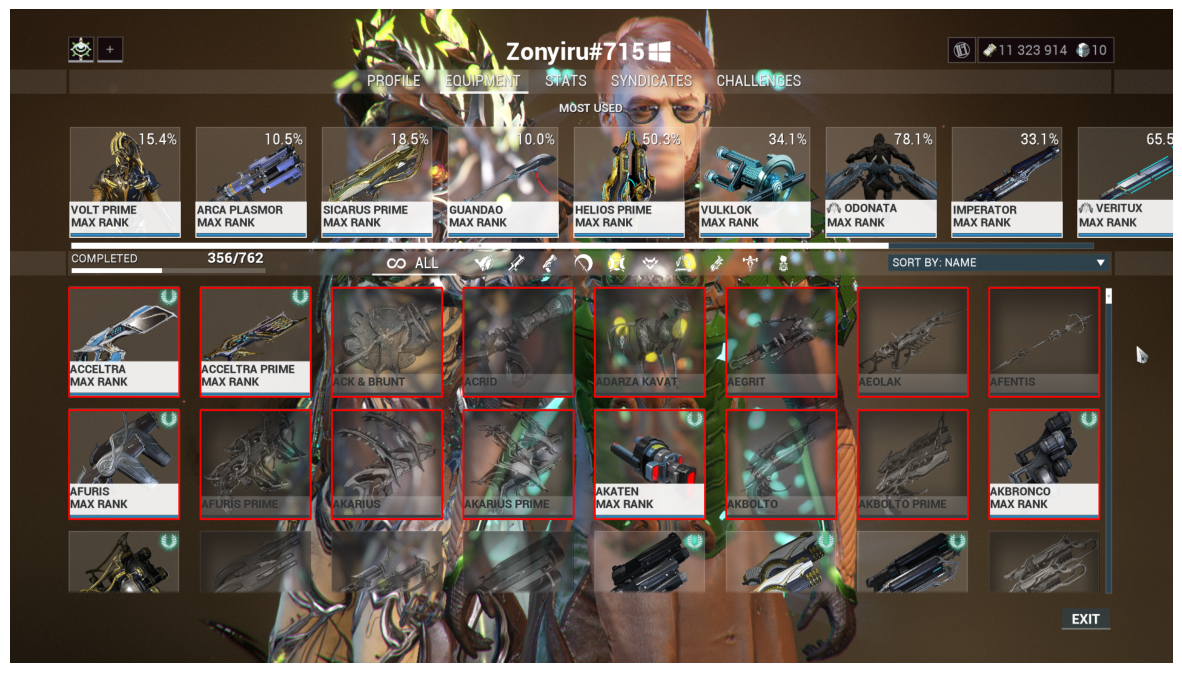

In [ ]:
draw_rectangles(path = path_first, START_Y=460)

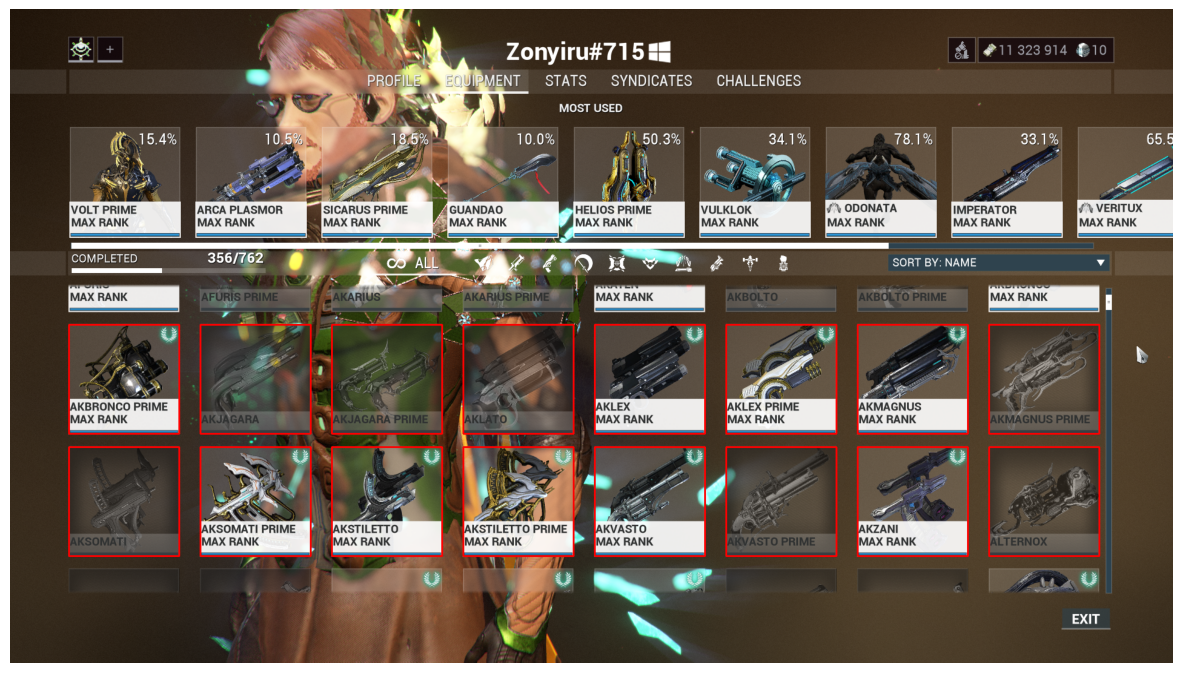

In [44]:
draw_rectangles(path = path_middle, START_Y=521)

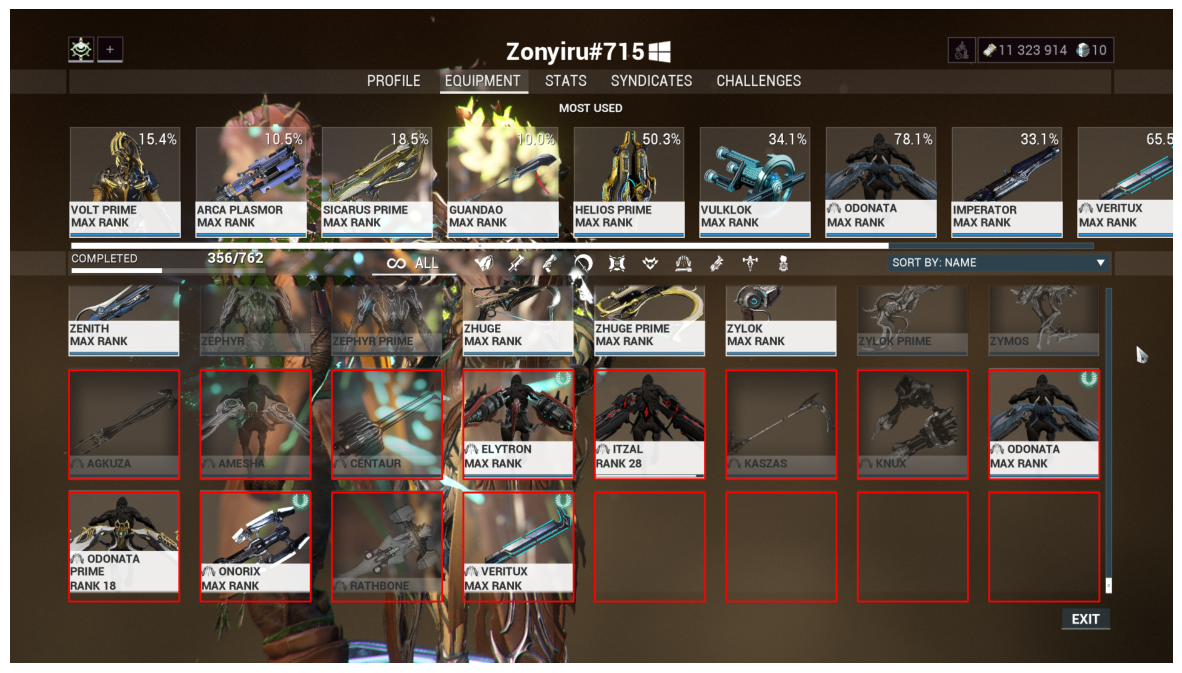

In [54]:
draw_rectangles(path = path_last, START_Y=596)

## Text extraction
From cropped image, use Tesseract to identify text. Because most of the words do not exist in english, the function uses the parameter `config=r'--oem 3 --psm 6'` to read more literally.

The path to the executable is required to get pytesseract working. The executable comes from the Tesseract installation—from its GitHub page, as far as I know, the pip installation does not create it, although it is necessary to do as well.

In [55]:
import pytesseract # Image-to-Text
from PIL import Image # Binary Transformation (PIL)
import pandas as pd # display

# Tesseract Installation Path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update path as needed

In [63]:
def image_to_text(path, START_X=97, START_Y=521, WIDTH=182, HEIGHT=180, GAP_X=35, GAP_Y=22, NUM_ROWS=2, NUM_COLS=8):
    # Load image
    img = cv2.imread(path)

    # Get text of every item
    for idx_row in range(NUM_ROWS):
        for idx_col in range(NUM_COLS):
            # Square sides
            left_side = START_X + idx_col * (WIDTH + GAP_X)
            right_side = left_side + WIDTH
            top_side = START_Y + idx_row * (HEIGHT + GAP_Y)
            bottom_side = top_side + HEIGHT

            # Crop Image
            top_side += int(HEIGHT / 2) # Keep only the text
            cropped = img[top_side:bottom_side, left_side:right_side]
            cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

            # Convert to grayscale
            gray = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)

            # Apply thresholding
            _, thresholded = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

            # Convert the processed image back to a PIL image for pytesseract
            pil_img = Image.fromarray(thresholded)

            # Extract text using pytesseract
            text = pytesseract.image_to_string(pil_img, config=r'--oem 3 --psm 6')
            display(pil_img)
            print(text.lower())

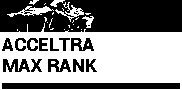

acceltra
max rank



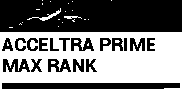

acceltra prime
max rank



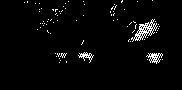

os
= ty a



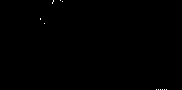

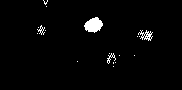

+ @
*



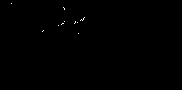

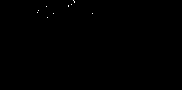

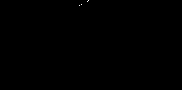

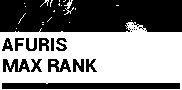

afuris
max rank



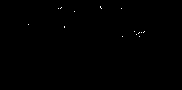

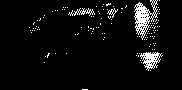

‘ e



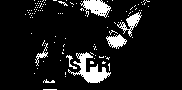

ras



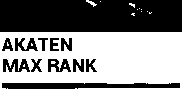

akaten
max rank



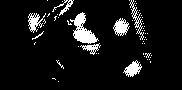

ee
> +



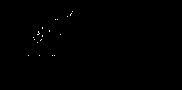

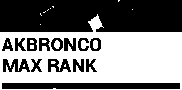

akbronco
max rank



In [64]:
image_to_text(path_first, START_Y=460)

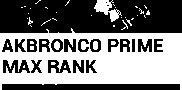

akbronco prime
max rank



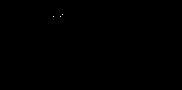

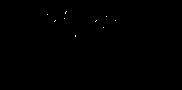

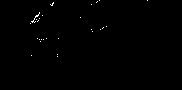

# zs



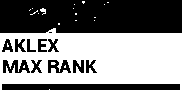

aklex
max rank



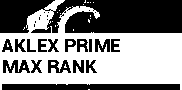

aklex prime
max rank



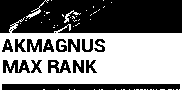

pa:
akmagnus
max rank



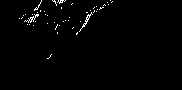

bf



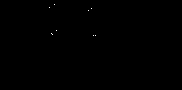

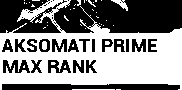

aksomati prime
max rank



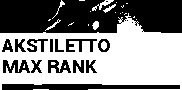

aan
akstiletto
max rank



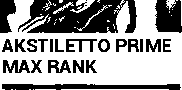

akstiletto prime
max rank



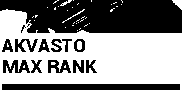

oe
akvasto
max rank



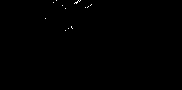

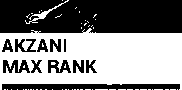

akzani
max rank



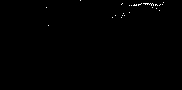

In [65]:
image_to_text(path_middle)

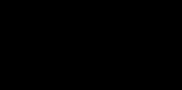

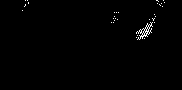

a



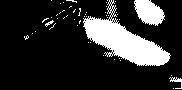

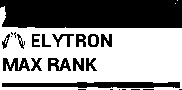

¢\ elytron
max rank



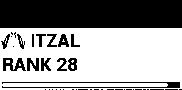

on itzal
rank 28



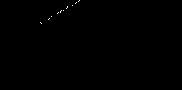

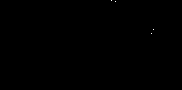

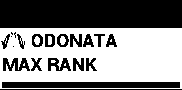

vy odonata
max rank



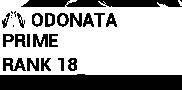

ies
gy odonata

prime

rank 18
be



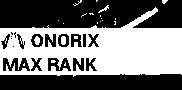

wat <<
#"\ onorix
max rank



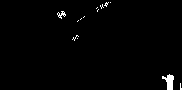

+



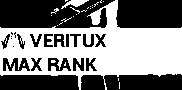

#\ veritux
max rank
1



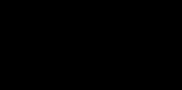

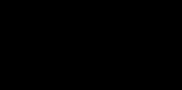

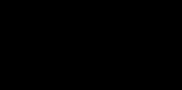

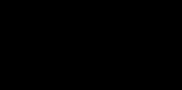

In [66]:
image_to_text(path = path_last, START_Y=596)

Using the full image leads to inconsistent character detection, so, as shown above, it is cropped in half. 